In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [37]:
BASEPATH = './'
sys.path.insert(0, BASEPATH)
os.chdir(BASEPATH)
MODELPATH = './model'


num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48
input_shape= (width, height, 1)


data = pd.read_csv('./fer2013.csv')

print(data.head())

pixels = data['pixels'].tolist()

faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    face = np.asarray(face).reshape(width, height)
    faces.append(face.astype('float32'))

faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)

emotions = pd.get_dummies(data['emotion']).values


sss = StratifiedShuffleSplit(n_splits=3, test_size=0.1, random_state=42)

for train_index, test_index in sss.split(faces,emotions):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = faces[train_index], faces[test_index]
    y_train, y_test = emotions[train_index], emotions[test_index]

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
TRAIN: [30684 27071 24714 ... 12064   452 12073] TEST: [ 6988 26035 21520 ...  8746 14677 17877]
TRAIN: [26463  1560 15077 ... 32518 28000 26697] TEST: [29263 34953 14348 ...  5597 30503  6333]
TRAIN: [30602 22825 13216 ... 11594 35010 29302] TEST: [ 3373 22979 30762 ... 24423 23698 10089]


In [38]:
from tensorflow.keras.models import load_model


emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
model_loaded = load_model('./model')

In [39]:
predictions = model_loaded.predict(X_test)

In [40]:
predictions = [int(np.argmax(prediction)) for prediction in predictions]
predictions

[6,
 5,
 4,
 4,
 0,
 6,
 6,
 3,
 6,
 6,
 5,
 5,
 4,
 3,
 6,
 3,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 0,
 4,
 4,
 6,
 6,
 4,
 3,
 0,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 6,
 4,
 6,
 6,
 6,
 0,
 3,
 0,
 0,
 3,
 6,
 6,
 4,
 5,
 0,
 6,
 4,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 3,
 3,
 6,
 4,
 6,
 6,
 6,
 6,
 0,
 3,
 3,
 4,
 0,
 0,
 0,
 0,
 6,
 0,
 3,
 6,
 6,
 3,
 0,
 5,
 4,
 6,
 3,
 6,
 6,
 0,
 6,
 6,
 3,
 6,
 6,
 6,
 0,
 6,
 6,
 3,
 0,
 0,
 0,
 6,
 4,
 5,
 6,
 0,
 6,
 6,
 0,
 3,
 6,
 3,
 6,
 3,
 6,
 3,
 0,
 6,
 6,
 3,
 3,
 1,
 6,
 6,
 3,
 6,
 6,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 3,
 6,
 0,
 3,
 5,
 0,
 0,
 0,
 6,
 0,
 3,
 3,
 3,
 6,
 0,
 6,
 6,
 6,
 6,
 4,
 3,
 6,
 0,
 6,
 4,
 3,
 6,
 6,
 6,
 0,
 6,
 4,
 0,
 0,
 3,
 6,
 6,
 6,
 6,
 0,
 3,
 3,
 6,
 0,
 6,
 3,
 6,
 4,
 6,
 6,
 5,
 6,
 6,
 6,
 0,
 4,
 5,
 6,
 6,
 4,
 0,
 6,
 5,
 0,
 3,
 6,
 0,
 4,
 3,
 0,
 6,
 0,
 3,
 4,
 6,
 0,
 6,
 0,
 3,
 4,
 0,
 0,
 6,
 0,
 4,
 5,
 0,
 6,
 5,
 6,
 6,
 0,
 1,
 6,
 3,
 6,
 6,
 0,
 6,
 6,
 3,
 0,
 5,
 4,
 5,
 6,


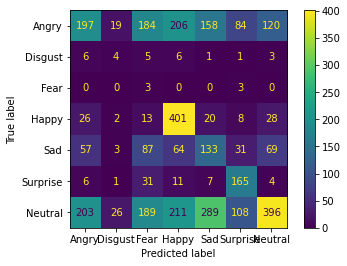

In [41]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay


y_test_arg=np.argmax(y_test,axis=1)
ConfusionMatrixDisplay.from_predictions(predictions, y_test_arg, display_labels=list(emotion_dict.values()))

plt.show()


In [42]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test_arg, predictions))

0.3619392588464753


In [4]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

In [5]:
def create_emotion_classifier():
    inputs = layers.Input(shape=input_shape)
    
    # data augmenting
    augmented = data_augmentation(inputs)
    
    # first layer of filters
    x = layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', data_format='channels_last', kernel_regularizer=l2(0.01))(augmented)
    x = layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)
    
    # deeper layers
    for i in range(1, 4):
        x = layers.Conv2D(pow(2, i)*num_features, kernel_size=(3, 3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(pow(2, i)*num_features, kernel_size=(3, 3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
        x = layers.Dropout(0.5)(x)
        
    x = layers.Flatten()(x)
    
    for i in range(3,0, -1):
        x = layers.Dense(pow(2, i) * num_features, activation='relu')(x)
        x = layers.Dropout(0.4)(x)
    
    # Output classification
    logits = layers.Dense(num_labels, activation='softmax')(x)
    
    # model creation
    model = keras.Model(inputs=inputs, outputs=logits)
    return model
   

In [1]:
def run_experiment(model):
    model.summary()

    model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
                  metrics=['accuracy'])

    lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)


    early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')

    checkpointer = ModelCheckpoint(MODELPATH, monitor='val_loss', verbose=1, save_best_only=True)

    # start learning
    history = model.fit(np.array(X_train), np.array(y_train),
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(np.array(X_test), np.array(y_test)),
                        callbacks=[lr_reducer, early_stopper, checkpointer])

    # model evaluating
    scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size=batch_size)
    print("Loss: " + str(scores[0]))
    print("Accuracy: " + str(scores[1]))
    
    return history

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
data_augmentation (Sequentia (None, 48, 48, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856 

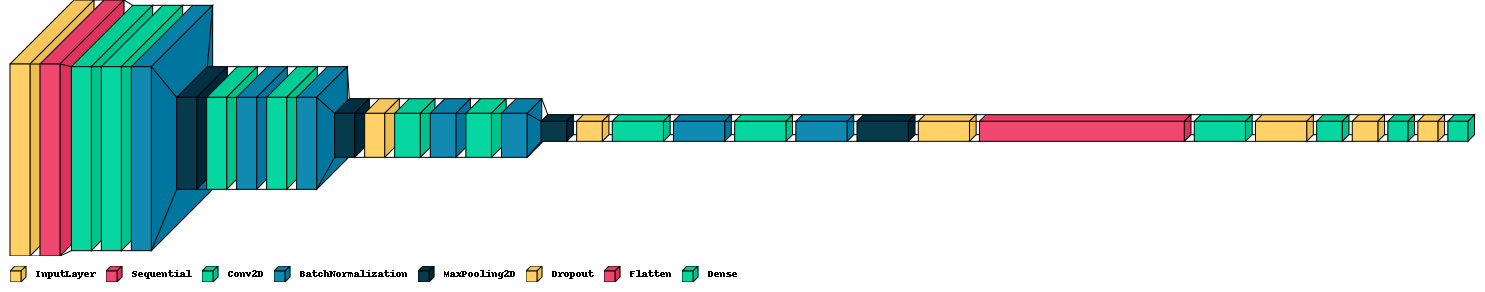

In [8]:
import visualkeras
from PIL import ImageFont
emotion_classifier = create_emotion_classifier()
emotion_classifier.summary()
visualkeras.layered_view(emotion_classifier, legend=True)

# history = run_experiment(emotion_classifier)

In [9]:
# # list all data in history
# print(history.history.keys())

# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()